In [19]:
library(ggplot2) |> suppressPackageStartupMessages() |> suppressWarnings()
library(maps) |> suppressPackageStartupMessages() |> suppressWarnings()
library(tidyverse) |> suppressPackageStartupMessages() |> suppressWarnings()
library(rnaturalearth)
library(mapview)

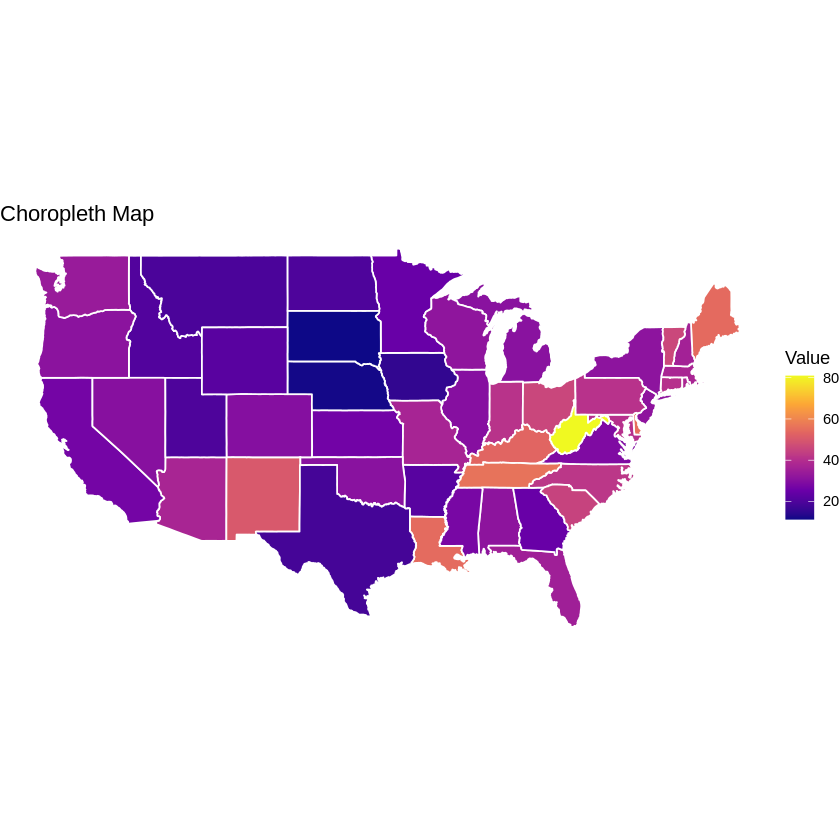

In [26]:
# Load US states map data
us_states <- map_data("state")

# add column for state abbreviations
state_abbr <- data.frame(
  region = tolower(state.name),
  state_abbrev = state.abb
)
us_states <- left_join(us_states, state_abbr, by = "region")

# load in data
data <- read.csv('../data/clean/combined.csv') |> filter(year==2022)

# Merge with map data
merged_df <- left_join(us_states, data, by = "state_abbrev")

# Plot
ggplot(merged_df, aes(long, lat, group = group, fill = overdose_death_rate)) +
  geom_polygon(color = "white") +
  scale_fill_viridis_c(option = "plasma", na.value = "grey90") +
  theme_void() +
	coord_map() +
  labs(title = "Choropleth Map", fill = "Value")